In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
#| default_exp plot

In [9]:
#| hide
from nbdev.showdoc import *

In [10]:
#| export
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse


In [11]:
#| export
def plot_2d_mix_guassian(X, means, covariances, predictions=None):
    plt.figure(figsize=(10, 7))
    
    if predictions is not None:
        # Scatter plot of data points with cluster assignments
        plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='viridis', s=30, alpha=0.6, label="Data Points")
    
    # Plot Gaussian ellipses
    for i in range(len(means)):
        plot_gaussian_ellipse(means[i], covariances[i], edgecolor='red')
        plt.scatter(means[i][0], means[i][1], c='red', s=100, label=f"Cluster {i+1} Mean")
    
    plt.title("Gaussian Mixture Model Clustering (EM Algorithm)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc="upper right")
    plt.grid()
    plt.show()


def plot_gaussian_ellipse(mean, covariance, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    eigvals, eigvecs = np.linalg.eigh(covariance)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * np.sqrt(eigvals)
    # The angle is kwarg, openai make a mistake here
    ellipse = Ellipse(mean, width, height, angle=angle, **kwargs)
    ax.add_patch(ellipse)
    ellipse.set_alpha(0.3)


(300, 2)


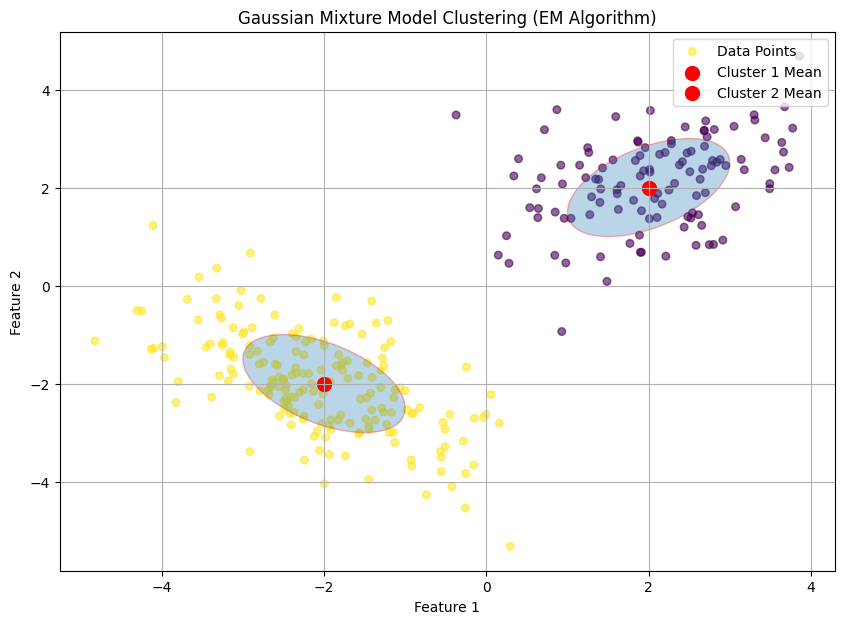

In [12]:
from eval_llm_coding.data import generate_mixed_gaussian_data

# Generate synthetic data
np.random.seed(42)


means = np.array([[2, 2], [-2, -2]])
covariances = [np.array([[1, 0.5], [0.5, 1]]),
               np.array([[1, -0.5], [-0.5, 1]])
            ]
weights = [0.4, 0.6] 
n_samples = 300

X, y = generate_mixed_gaussian_data(n_samples, means, covariances, weights)
print(X.shape)

# Visualize results
plot_2d_mix_guassian(X, means, covariances, y)



In [13]:
#| hide
import nbdev; nbdev.nbdev_export()